In [1]:
import numpy as np

In [2]:
#we will implement cosine similarity 

In [5]:
text = ["London Paris London", "Paris Paris London"]

# come up with something like this -> [[2,1],[1,2]] (counts the number of times London and Paris appears in each of the element in the text list)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_fit = cv.fit_transform(text)

print(cv.get_feature_names())
returnArray = cv_fit.toarray()

['london', 'paris']


In [6]:
returnArray[0]

array([2, 1])

In [7]:
import matplotlib.pyplot as plt

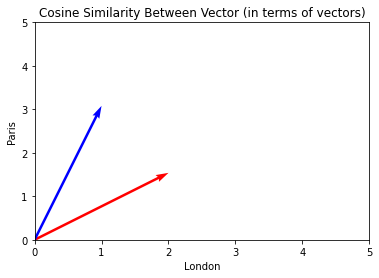

In [43]:
V = returnArray
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=5)
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Cosine Similarity Between Vector (in terms of vectors)")
plt.xlabel("London")
plt.ylabel("Paris")
plt.show()

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(returnArray)

In [30]:
print(similarity_scores)

#similarity matrix is printed below

[[1.  0.8]
 [0.8 1. ]]


In [31]:
#first text is similar to first text 100%. First text is similar to second text 80%. Same thing does with the second row.